<a href="https://colab.research.google.com/github/poojaa596/CODSOFT-/blob/main/Sales2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [2]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

In [4]:
print(df.head())
print(df.info())
print(df.describe())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000

In [5]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [7]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Absolute Error: 1.2748262109549338
Mean Squared Error: 2.9077569102710896
R² Score: 0.9059011844150826


In [8]:
sample_input = [[230.1, 37.8, 69.2]]
predicted_sales = model.predict(sample_input)
print("Predicted Sales for given input:", predicted_sales[0])

Predicted Sales for given input: 21.372540280396883


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


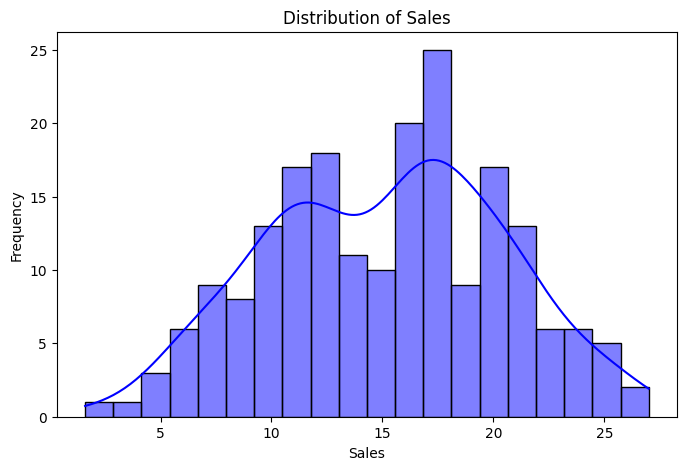

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=20, kde=True, color='blue')
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


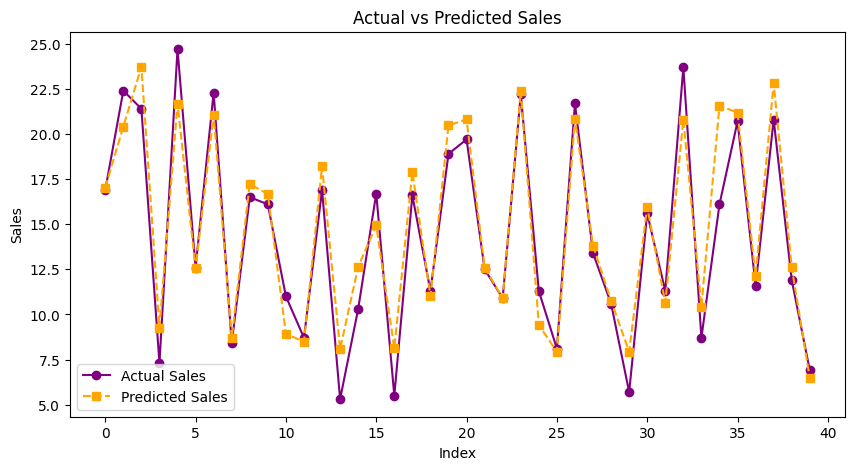

In [45]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Sales', marker='o', linestyle='-', color='purple')
plt.plot(y_pred, label='Predicted Sales', marker='s', linestyle='--', color='orange')
plt.title("Actual vs Predicted Sales")
plt.xlabel("Index")
plt.ylabel("Sales")
plt.legend()
plt.show()


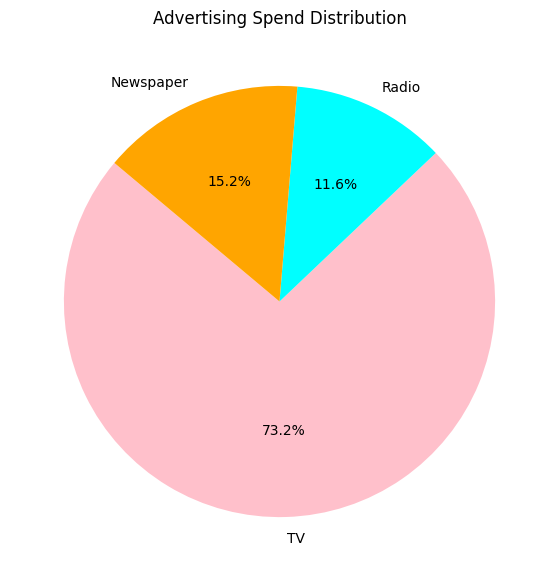

In [37]:
plt.figure(figsize=(7,7))
ad_spend = [df['TV'].sum(), df['Radio'].sum(), df['Newspaper'].sum()]
labels = ['TV', 'Radio', 'Newspaper']
colors = ['pink', 'cyan', 'orange']
plt.pie(ad_spend, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Advertising Spend Distribution")
plt.show()

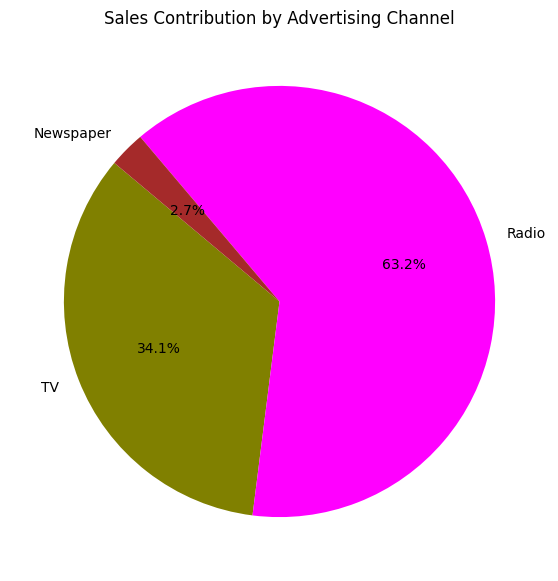

In [39]:
coefficients = model.coef_
plt.figure(figsize=(7,7))
plt.pie(coefficients, labels=['TV', 'Radio', 'Newspaper'], autopct='%1.1f%%', colors=['olive', 'magenta', 'brown'], startangle=140)
plt.title("Sales Contribution by Advertising Channel")
plt.show()